In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/JDPK/Downloads/user_behavior_dataset.csv")

In [3]:
df.shape

(700, 11)

In [10]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [4]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [7]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [9]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [11]:
df['User Behavior Class'].value_counts()

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      364
Female    336
Name: count, dtype: int64

In [13]:
df['Operating System'].value_counts()

Operating System
Android    554
iOS        146
Name: count, dtype: int64

In [14]:
df['Device Model'].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

In [15]:
# Drop unnecessary columns and rename for simplicity
df = df.drop(columns=['User ID'])

In [16]:
df.rename(columns={
    'Device Model': 'device_model',
    'Operating System': 'os',
    'App Usage Time (min/day)': 'usage_min',
    'Screen On Time (hours/day)': 'screen_time_hr',
    'Battery Drain (mAh/day)': 'battery_drain',
    'Number of Apps Installed': 'num_apps',
    'Data Usage (MB/day)': 'data_usage_mb',
    'Age': 'age',
    'Gender': 'gender',
    'User Behavior Class': 'behavior_class'
}, inplace=True)

In [17]:
# Identify numerical and categorical columns
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", num_features)
print("Categorical Columns:", cat_features)

Numerical Columns: ['usage_min', 'screen_time_hr', 'battery_drain', 'num_apps', 'data_usage_mb', 'age', 'behavior_class']
Categorical Columns: ['device_model', 'os', 'gender']


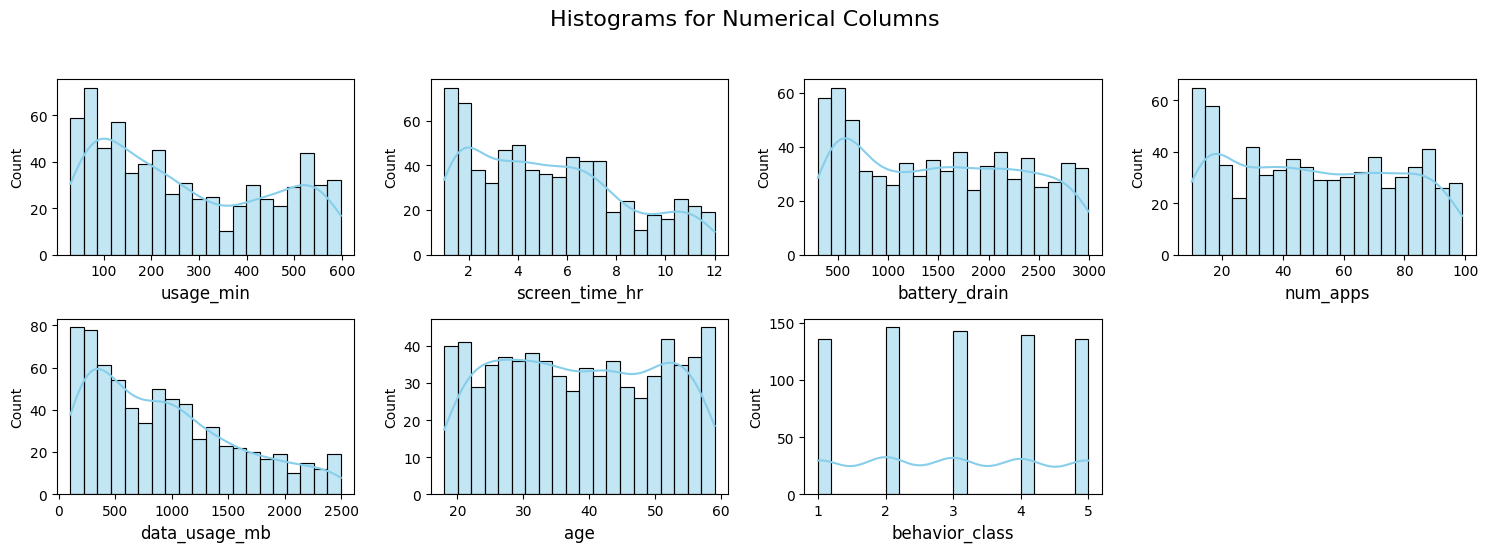

In [ ]:
# Histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_features, 1):
    ax = plt.subplot(4, 4, i)
    sns.histplot(df[column], bins=20, kde=True, color='skyblue', ax=ax)
    ax.set_xlabel(column, fontsize=12)
plt.suptitle('Histograms for Numerical Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])          # rect=[0, 0, 1, 0.99] leaves 1% space at the top for the title
plt.show()

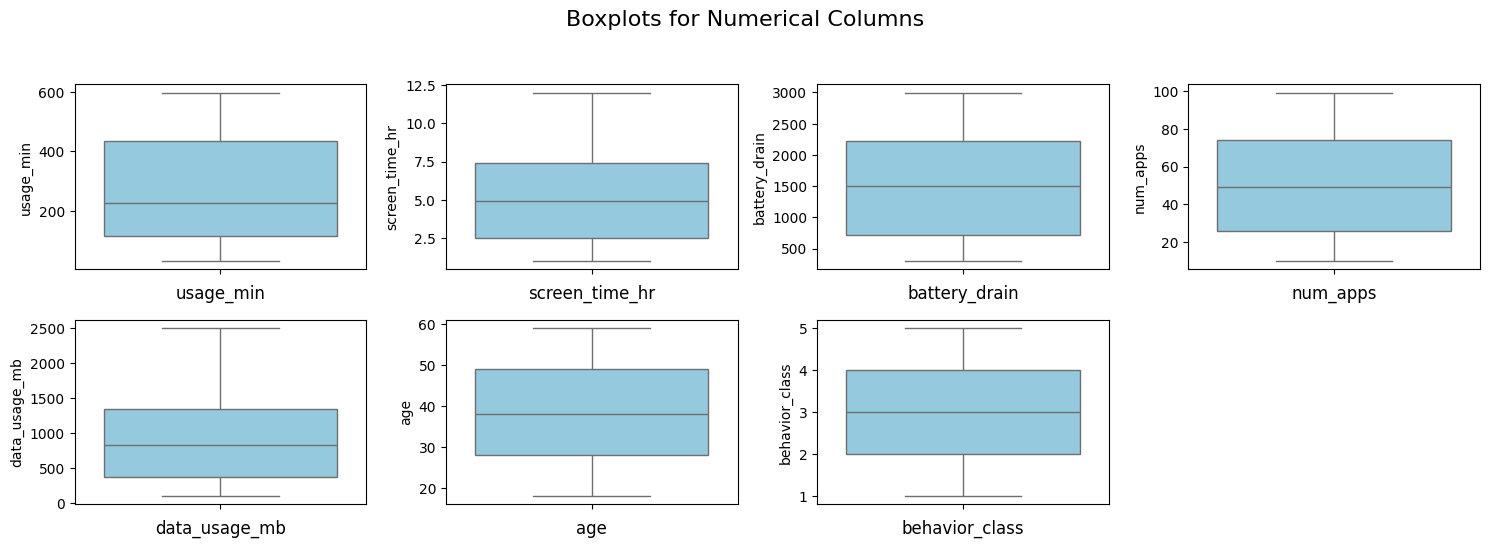

In [19]:
# Boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_features, 1):
    ax = plt.subplot(4, 4, i)
    sns.boxplot(df[column], color='skyblue', ax=ax)
    ax.set_xlabel(column, fontsize=12)
plt.suptitle('Boxplots for Numerical Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [20]:
# Calculate the IQR for each numerical column and identify outliers
for column in num_features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers in the current column
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f'Outliers in {column}:')
    print(outliers[[column]])
    print(f'Number of outliers: {len(outliers)}\n')

Outliers in usage_min:
Empty DataFrame
Columns: [usage_min]
Index: []
Number of outliers: 0

Outliers in screen_time_hr:
Empty DataFrame
Columns: [screen_time_hr]
Index: []
Number of outliers: 0

Outliers in battery_drain:
Empty DataFrame
Columns: [battery_drain]
Index: []
Number of outliers: 0

Outliers in num_apps:
Empty DataFrame
Columns: [num_apps]
Index: []
Number of outliers: 0

Outliers in data_usage_mb:
Empty DataFrame
Columns: [data_usage_mb]
Index: []
Number of outliers: 0

Outliers in age:
Empty DataFrame
Columns: [age]
Index: []
Number of outliers: 0

Outliers in behavior_class:
Empty DataFrame
Columns: [behavior_class]
Index: []
Number of outliers: 0



In [21]:
# Initialize LabelEncoders
gender_encoder = LabelEncoder()
os_encoder = LabelEncoder()
device_model_encoder = LabelEncoder()

# Fit and transform categorical columns
df['gender'] = gender_encoder.fit_transform(df['gender'])
df['os'] = os_encoder.fit_transform(df['os'])
df['device_model'] = device_model_encoder.fit_transform(df['device_model'])

In [23]:
# Standardization (Z-score scaling)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_features])

# Convert them back to DataFrame:
df_scaled_standard = pd.DataFrame(df_scaled, columns=num_features)

In [24]:
df_scaled_standard.head()

,usage_min,screen_time_hr,battery_drain,num_apps,data_usage_mb,age,behavior_class
0,0.688256,0.367626,0.423726,0.606096,0.300405,0.126383,0.721184
1,-0.017668,-0.186771,-0.237198,-0.322441,0.022277,0.709506,0.007140
2,-0.661471,-0.415053,-0.933550,-0.693856,-0.949607,0.292989,-0.706903
3,-0.181443,-0.154160,0.184279,0.197540,-0.091787,-1.539682,0.007140
4,-0.475107,-0.317218,-0.193218,0.271823,0.091028,-0.623346,0.007140


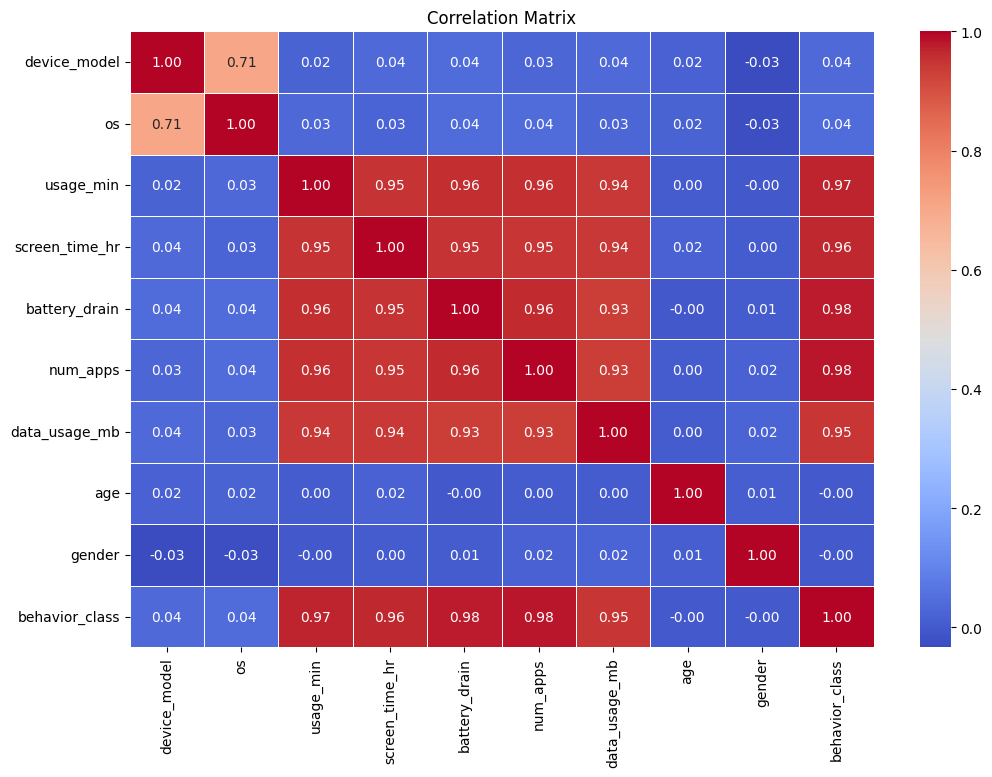

In [25]:
# Correlation matrix and heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [27]:
# Get the highly correlated pairs (correlation > 0.9)
highly_correlated = corr_matrix.unstack().sort_values(ascending=False)
highly_correlated = highly_correlated[highly_correlated < 1.0]      # Remove self-correlation (1.0 values)
highly_correlated = highly_correlated[highly_correlated > 0.9]      # Filter correlations > 0.9
# Remove redundant pairs (i.e., keep only one of the pair: (A, B) and (B, A))
highly_correlated = highly_correlated[highly_correlated.index.get_level_values(0) < highly_correlated.index.get_level_values(1)]

print(highly_correlated)

behavior_class  num_apps          0.981255
battery_drain   behavior_class    0.978587
behavior_class  usage_min         0.970498
                screen_time_hr    0.964581
battery_drain   num_apps          0.961853
                usage_min         0.956385
num_apps        usage_min         0.955253
screen_time_hr  usage_min         0.950333
battery_drain   screen_time_hr    0.948983
num_apps        screen_time_hr    0.946975
behavior_class  data_usage_mb     0.946734
data_usage_mb   usage_min         0.942308
                screen_time_hr    0.941322
                num_apps          0.934800
battery_drain   data_usage_mb     0.932276
dtype: float64


In [26]:
# Calculate VIF to detect multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = num_features
vif_data["VIF"] = [variance_inflation_factor(df[num_features].values, i) for i in range(len(num_features))]
print("Variance Inflation Factors (VIF):")
print(vif_data)

Variance Inflation Factors (VIF):
          Feature         VIF
0       usage_min   58.362966
1  screen_time_hr   64.260244
2   battery_drain  106.405705
3        num_apps  119.290727
4   data_usage_mb   35.219028
5             age    6.238740
6  behavior_class  244.327592


In [30]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return (vif)

calc_vif(df[[i for i in df.describe().columns if i not in ["behavior_class"]]])

,variables,VIF
0,device_model,5.431997
1,os,2.469241
2,usage_min,59.258951
3,screen_time_hr,60.225763
4,battery_drain,80.679918
5,num_apps,79.409990
6,data_usage_mb,35.230453
7,age,5.526161
8,gender,1.996027


In [32]:
calc_vif(df[[i for i in df.describe().columns if i not in ["battery_drain", "behavior_class", "num_apps"]]])

,variables,VIF
0,device_model,5.335155
1,os,2.465240
2,usage_min,43.991396
3,screen_time_hr,49.413651
4,data_usage_mb,34.288126
5,age,4.982765
6,gender,1.960620


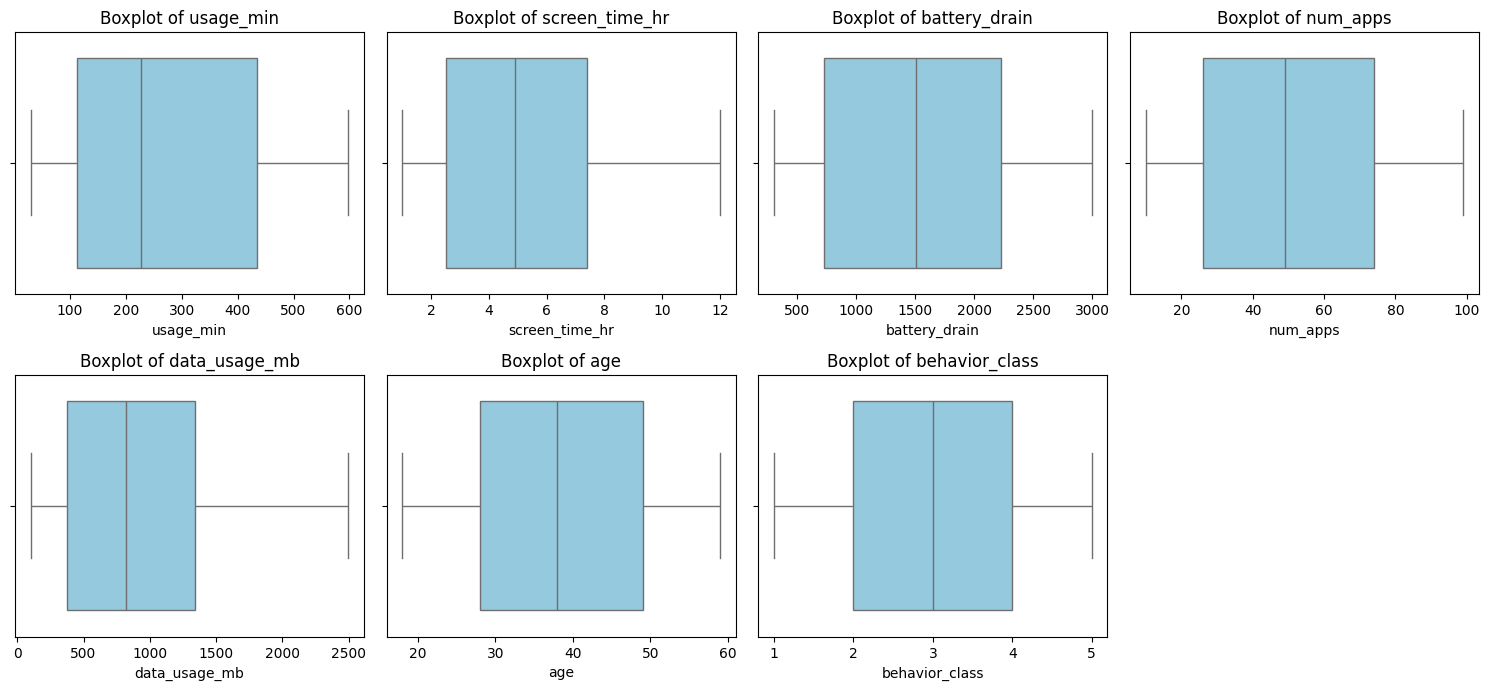

In [34]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(num_features):
    plt.subplot(3, 4, i+1)  # Adjust the number of rows and columns
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [37]:
# X = features (excluding the target column)
# y = target (behavior_class)

X = df.drop(columns=['behavior_class', 'battery_drain'])
y = df['behavior_class']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X.columns

Index(['device_model', 'os', 'usage_min', 'screen_time_hr', 'num_apps',
       'data_usage_mb', 'age', 'gender'],
      dtype='object')

In [39]:
# Initialize classifiers
lr_clf = LogisticRegression(max_iter=4000, solver='saga', random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

In [40]:
# Define a function to evaluate each model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Evaluate Logistic Regression, Random Forest, Gradient Boosting
lr_results = evaluate_model(lr_clf, X_train, X_test, y_train, y_test)
rf_results = evaluate_model(rf_clf, X_train, X_test, y_train, y_test)
gb_results = evaluate_model(gb_clf, X_train, X_test, y_train, y_test)


# Print the results for each model
print("Logistic Regression - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1: {:.2f}".format(*lr_results))
print("Random Forest - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1: {:.2f}".format(*rf_results))
print("Gradient Boosting - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1: {:.2f}".format(*gb_results))

Logistic Regression - Accuracy: 0.70, Precision: 0.72, Recall: 0.70, F1: 0.70
Random Forest - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00
Gradient Boosting - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00


In [41]:
import pickle

In [43]:
# Save each model to a separate file
with open('rf_model_v1.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

with open('gb_model_v1.pkl', 'wb') as f:
    pickle.dump(gb_clf, f)

# Save the encoders
with open('device_encoder_v1.pkl', 'wb') as f:
    pickle.dump(device_model_encoder, f)

with open('os_encoder_v1.pkl', 'wb') as f:
    pickle.dump(os_encoder, f)

with open('gender_encoder_v1.pkl', 'wb') as f:
    pickle.dump(gender_encoder, f)

# StandardScaler for scaling numerical features
scaler = StandardScaler().fit(X_train[['usage_min', 'screen_time_hr', 'data_usage_mb', 'num_apps', 'age']])

# Save the scaler
with open('feature_scaler_v1.pkl', 'wb') as f:
    pickle.dump(scaler, f)



In [44]:
# Save the order of columns in X_train
with open("columns_order_v1.pkl", "wb") as f:
    pickle.dump(list(X_train.columns), f)

In [45]:
print(gender_encoder.classes_)

['Female' 'Male']


In [46]:
print(os_encoder.classes_) 

['Android' 'iOS']


In [47]:
print(device_model_encoder.classes_) 

['Google Pixel 5' 'OnePlus 9' 'Samsung Galaxy S21' 'Xiaomi Mi 11'
 'iPhone 12']
